### BT 라이브러리
- [깃허브](https://github.com/pmorissette/bt?tab=readme-ov-file)
- [문서](https://pmorissette.github.io/bt/)
- [다운로드](https://pypi.org/project/bt/)

### 다운로드
```
pip install bt
```

### 코드
- backtest는 data와 strategy(s)을 통해 구성된다.
- 여러개의 strategy를 한 번에 실행하고 비교할 수 있다.
- 유용한 시각화 차트 기능을 제공한다.
- [ffn(financial functions for python)](https://github.com/pmorissette/ffn)에 의존성을 갖는다.

In [1]:
import warnings

import bt
import pandas as pd
from bt.algos import (
    Rebalance,
    RunMonthly,
    RunWeekly,
    SelectAll,
    WeighEqually,
    WeighInvVol,
)
from bt.backtest import Backtest, Result
from bt.core import Strategy

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# spy, agg 2개 ETF 가격 다운로드
data: pd.DataFrame = bt.get("spy,agg", start="2010-01-01")
data.head()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,spy,agg
Date,,
2010-01-04,86.860085,70.873344
2010-01-05,87.090004,71.195732
2010-01-06,87.151306,71.154556
2010-01-07,87.519211,71.072296
2010-01-08,87.810463,71.113411


In [3]:
# algos의 조합인 Strategy 생성, 전략(1)
strategy1 = Strategy("strategy1", [RunMonthly(), SelectAll(), WeighEqually(), Rebalance()])

In [4]:
# 여러 Strategy와 데이터를 활용하여 backtest 생성
backtest1 = Backtest(strategy1, data)

In [5]:
# backtest 실행
result: Result = bt.run(backtest1)

<Axes: title={'center': 'Equity Progression'}>

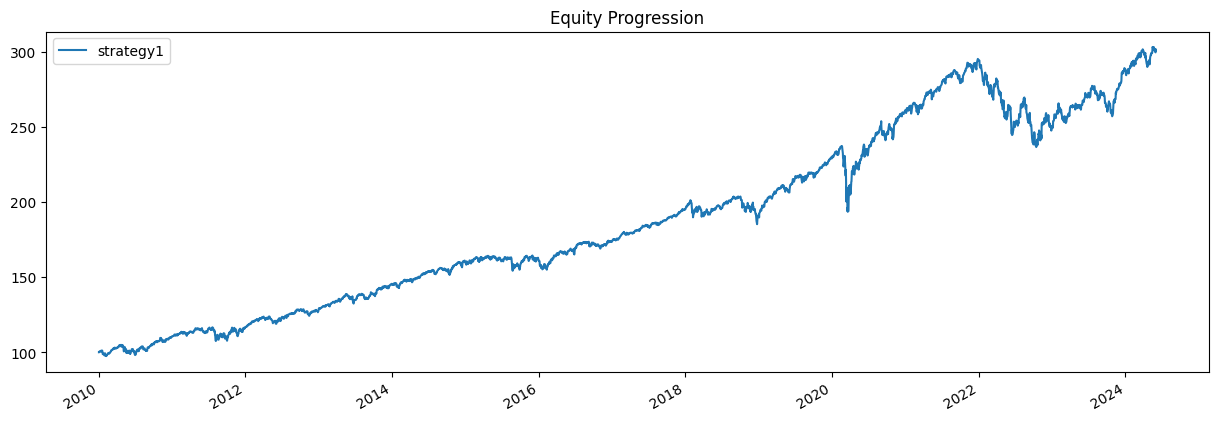

In [6]:
result.plot()

In [7]:
result.display()

Stat                 strategy1
-------------------  -----------
Start                2010-01-03
End                  2024-05-31
Risk-free rate       0.00%

Total Return         201.60%
Daily Sharpe         0.92
Daily Sortino        1.42
CAGR                 7.96%
Max Drawdown         -19.87%
Calmar Ratio         0.40

MTD                  3.37%
3m                   1.96%
6m                   8.93%
YTD                  4.61%
1Y                   13.95%
3Y (ann.)            3.26%
5Y (ann.)            7.87%
10Y (ann.)           7.10%
Since Incep. (ann.)  7.96%

Daily Sharpe         0.92
Daily Sortino        1.42
Daily Mean (ann.)    8.06%
Daily Vol (ann.)     8.79%
Daily Skew           -0.71
Daily Kurt           13.92
Best Day             4.77%
Worst Day            -6.63%

Monthly Sharpe       1.00
Monthly Sortino      1.83
Monthly Mean (ann.)  8.20%
Monthly Vol (ann.)   8.20%
Monthly Skew         -0.33
Monthly Kurt         1.00
Best Month           7.57%
Worst Month          -6.68%

Year

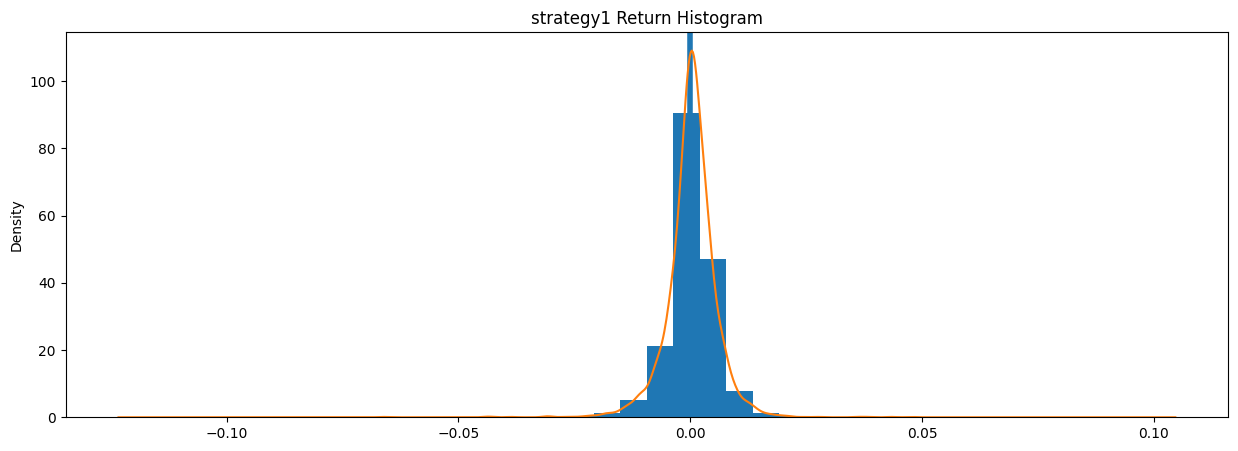

In [8]:

result.plot_histogram()

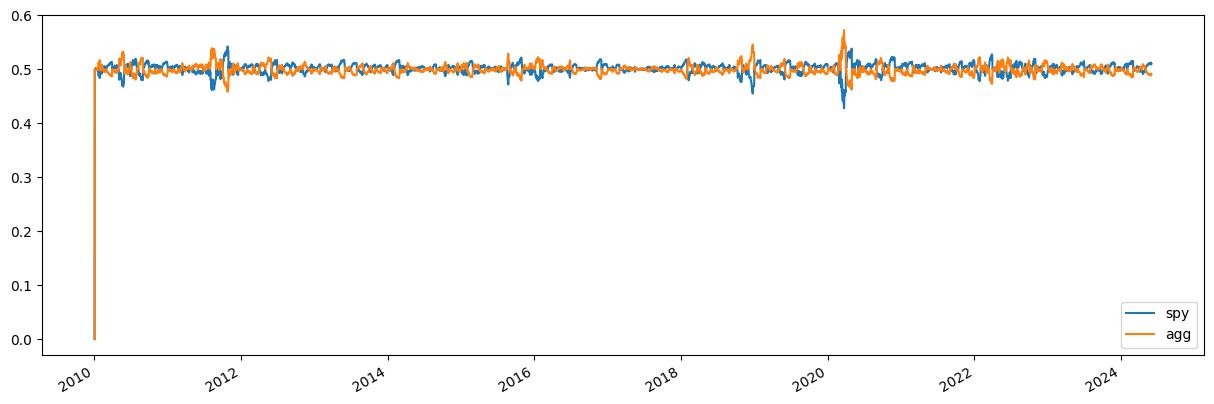

In [9]:
# 시간 변화에 따른 spy와 agg 종목의 가중치
result.plot_security_weights()

In [10]:
# 주단위 실행, 변동성의 역추값에 비례한 가중치 적용한 전략(2)
strategy2 = Strategy("strategy2", [RunWeekly(), SelectAll(), WeighInvVol(), Rebalance()])

In [11]:
# 백테스트 생성
backtest2 = Backtest(strategy2, data)

In [12]:
# 백테스트 실행
result2 = bt.run(backtest1, backtest2)

<Axes: title={'center': 'Equity Progression'}>

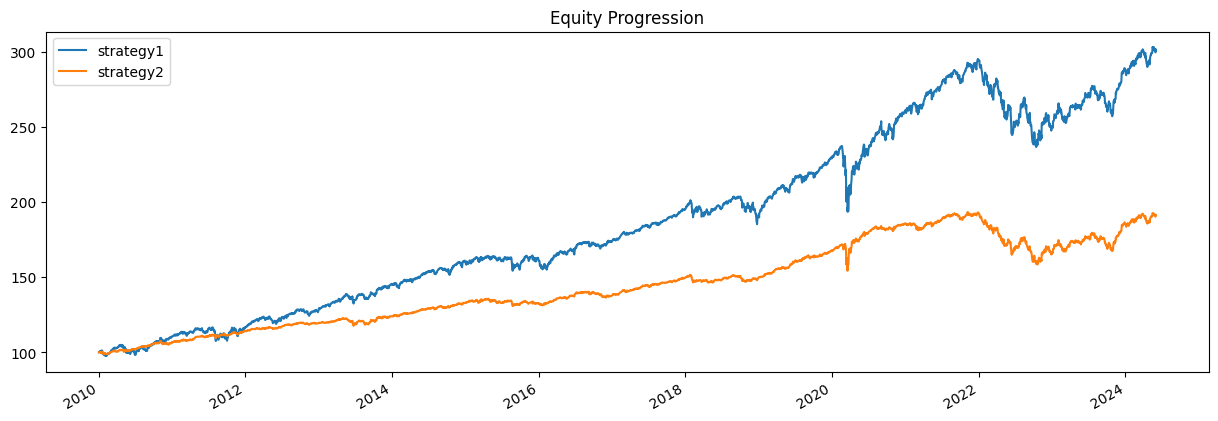

In [13]:
result2.plot()

In [14]:
result2.display()

Stat                 strategy1    strategy2
-------------------  -----------  -----------
Start                2010-01-03   2010-01-03
End                  2024-05-31   2024-05-31
Risk-free rate       0.00%        0.00%

Total Return         201.60%      91.49%
Daily Sharpe         0.92         0.91
Daily Sortino        1.42         1.39
CAGR                 7.96%        4.61%
Max Drawdown         -19.87%      -18.01%
Calmar Ratio         0.40         0.26

MTD                  3.37%        2.74%
3m                   1.96%        1.22%
6m                   8.93%        7.16%
YTD                  4.61%        3.00%
1Y                   13.95%       10.28%
3Y (ann.)            3.26%        0.95%
5Y (ann.)            7.87%        4.08%
10Y (ann.)           7.10%        4.07%
Since Incep. (ann.)  7.96%        4.61%

Daily Sharpe         0.92         0.91
Daily Sortino        1.42         1.39
Daily Mean (ann.)    8.06%        4.64%
Daily Vol (ann.)     8.79%        5.11%
Daily Skew        